#quantitative analysis of stock market


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df= pd.read_csv('stocks.csv')

In [2]:
print( df.head())
print( df.shape)
print( df.columns)
print(df.info())
print( df.describe())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
(248, 8)
Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
summary_stats = df.describe()
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
grouped = df.groupby('Ticker')

In [10]:
pivot_close = df.pivot(index='Date', columns='Ticker', values='Close')
correlation = pivot_close.pct_change().corr()
print("\nCorrelation Matrix:")
print(correlation)


Correlation Matrix:
Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.644430  0.568690  0.508072
GOOG    0.644430  1.000000  0.516622  0.404993
MSFT    0.568690  0.516622  1.000000  0.432184
NFLX    0.508072  0.404993  0.432184  1.000000


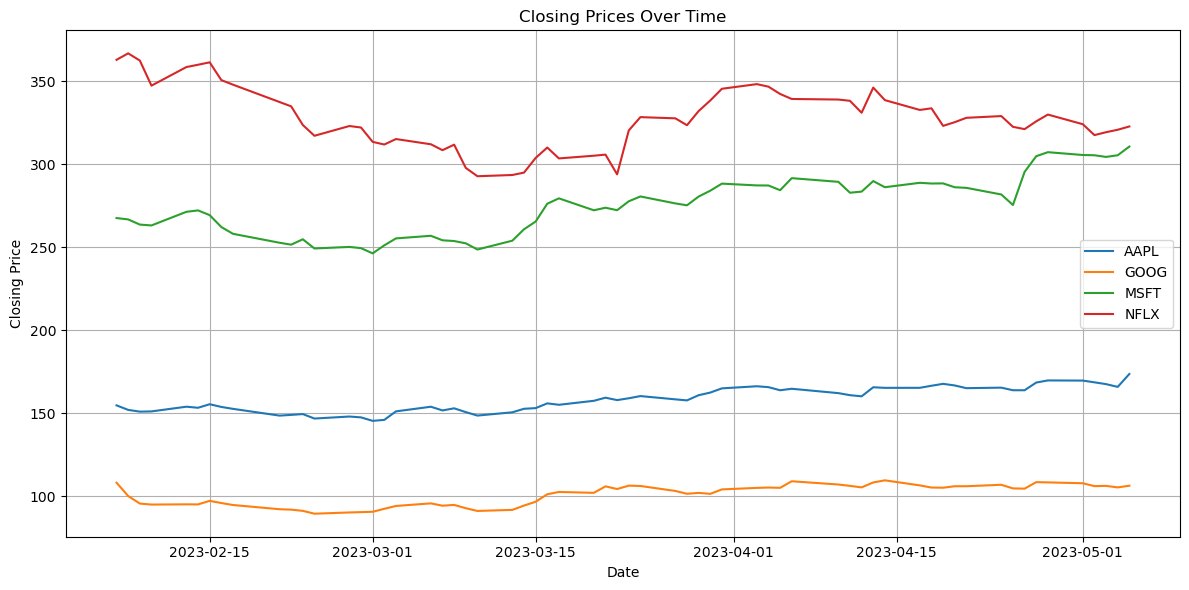

In [4]:
plt.figure(figsize=(12, 6))
for name, group in grouped:
    plt.plot(group['Date'], group['Close'], label=name)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

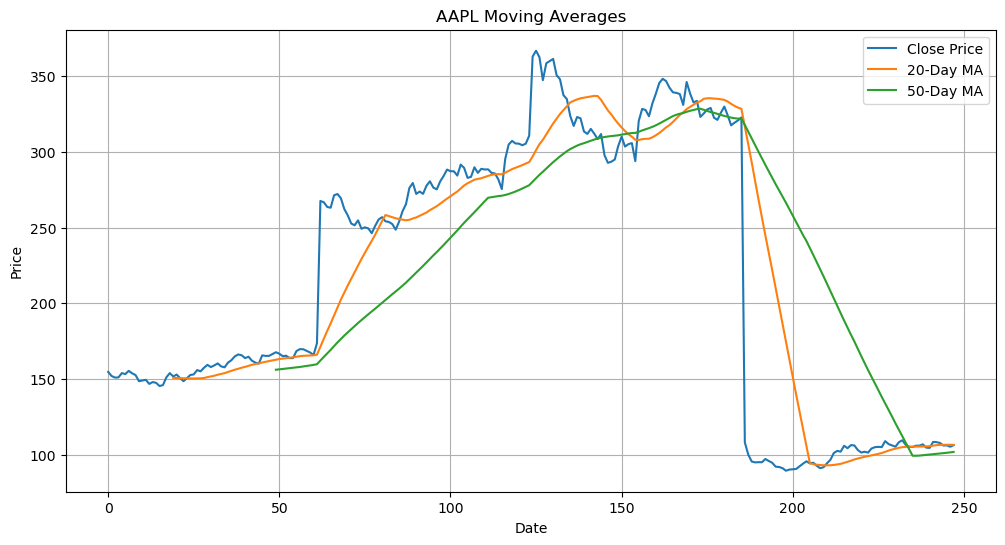

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.title('AAPL Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

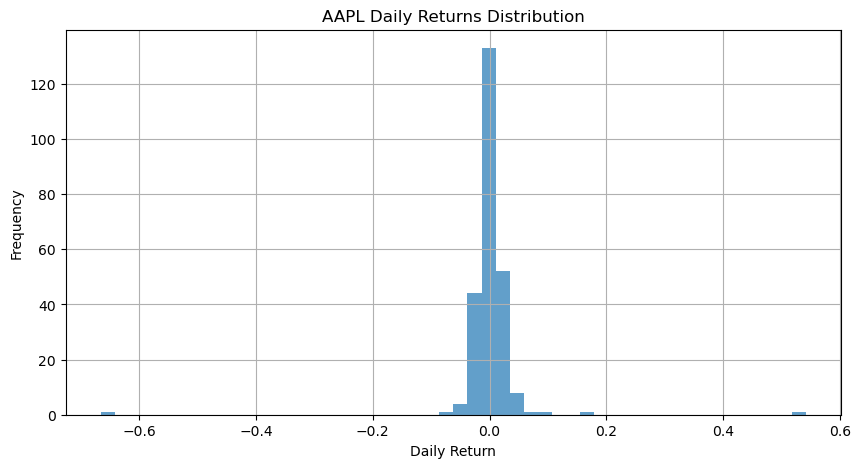

In [8]:
df['Daily Return'] = df['Close'].pct_change()


plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=50, alpha=0.7)
plt.title('AAPL Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

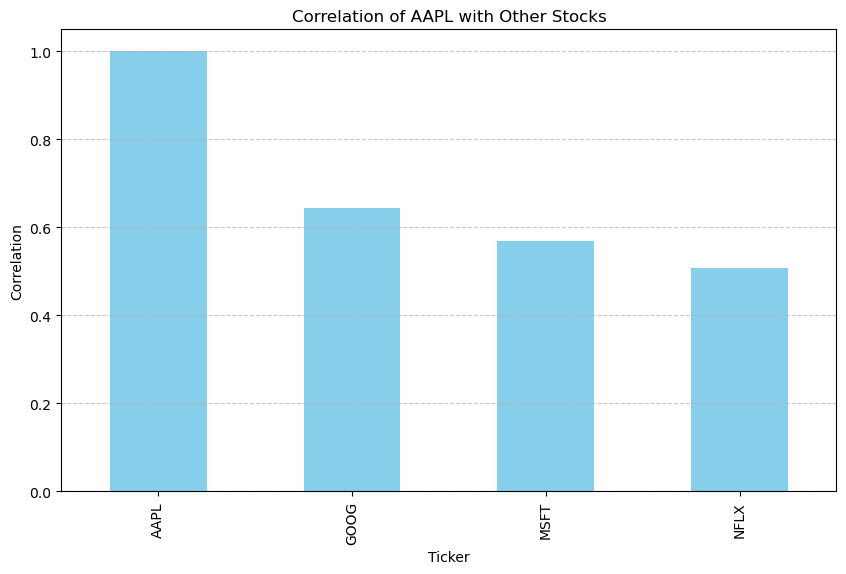

In [13]:
correlation['AAPL'].plot(kind='bar', figsize=(10, 6), color='skyblue', title='Correlation of AAPL with Other Stocks')
plt.xlabel('Ticker')
plt.ylabel('Correlation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

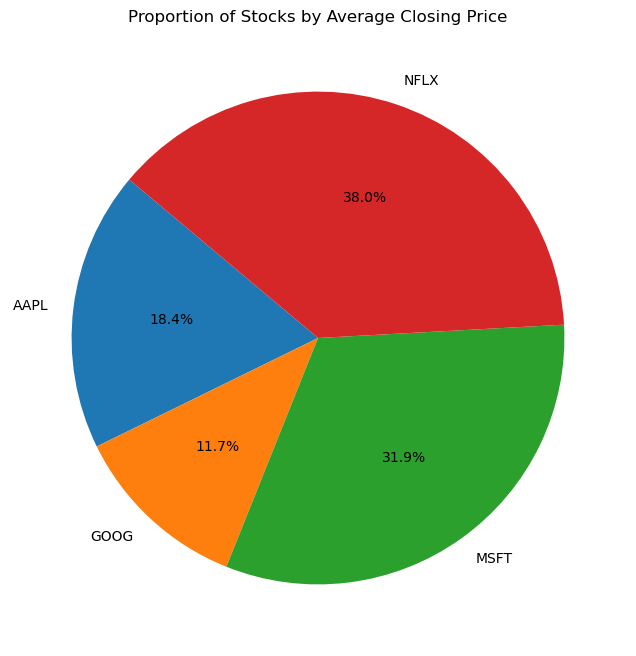

In [14]:
average_close = pivot_close.mean()
plt.figure(figsize=(8, 8))
plt.pie(average_close, labels=average_close.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Proportion of Stocks by Average Closing Price')
plt.show()